# Multiple Linear Regression

Multiple linear regression is similar to [simple linear regression](https://github.com/AlbinFranzen/ML-Algorithms-From-Scratch/blob/main/Supervised%20Learning/Regression/Simple%20Linear%20Regression.ipynb) however it generalises for multiple predictors instead of one. In accordance to the simple linear regression, the output remains a linear combination of the inputs: 

$$ y= \theta_0+\theta_1 x_1 + \theta_2 x_2...+\theta_n x_n $$

Let us generate data below:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
np.random.seed(42)

In [2]:
x = 2 * np.random.rand(100,1)
y = 4 + 3 * x + np.random.randn(100,1)
z = 3*x + y + np.random.randn(100,1)

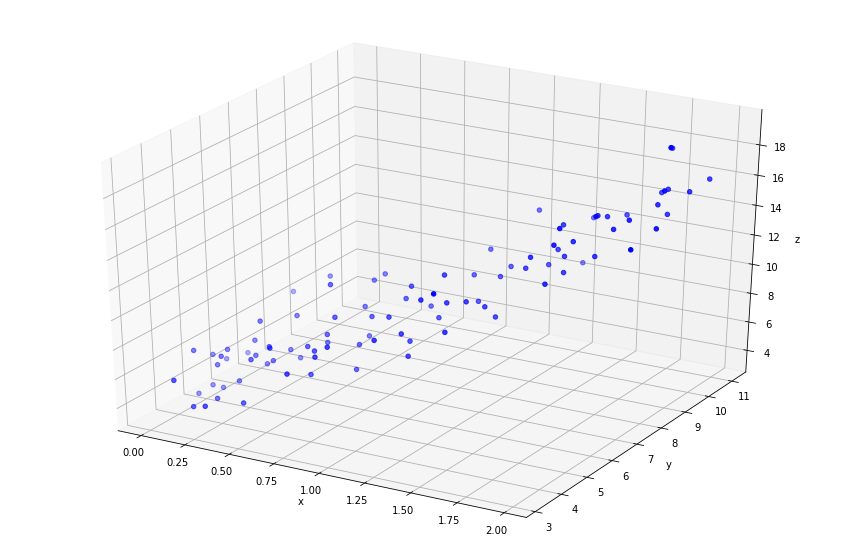

In [5]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c='b')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

Essentially we have created a plane with two inputs; $X$ which is uniformly distributed and $Y$ which is normally distributed such that they add up to an output $z$ by the plane equation $z=3x+y$ added with even more gaussian noise.

## Estimating the Coefficients

### Ordinary Least Squares

The linear coefficients for the dependant variables can be found using all methods described for simple linear regression. The simplest of these is with the normal equation:

$$\theta=(X^T X)^{-1} X^T y$$

However in this case each column of $X$ represents a new feature. 

In [6]:
x_b = np.c_[ np.ones(( 100, 1)), x] # add bias vector of 1s
X = np.c_[x_b,y]

theta_hat = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(z)
theta_hat

array([[0.14679242],
       [3.08025159],
       [0.97281755]])

The first term is the constant and is correctly near 0 and the second two are very close to the actual plane equation of $z=3x+y$. We can now plot the resulting plane:

In [7]:
x_new = np.linspace(0,2,100) #generate values for x to plot
y_new = np.linspace(3,12,100)

x_new_mesh,y_new_mesh = np.meshgrid(x_new,y_new)
z_new_mesh=theta_hat[0][0] +theta_hat[1][0]*x_new_mesh + theta_hat[2][0]*y_new_mesh #use expanded dot product

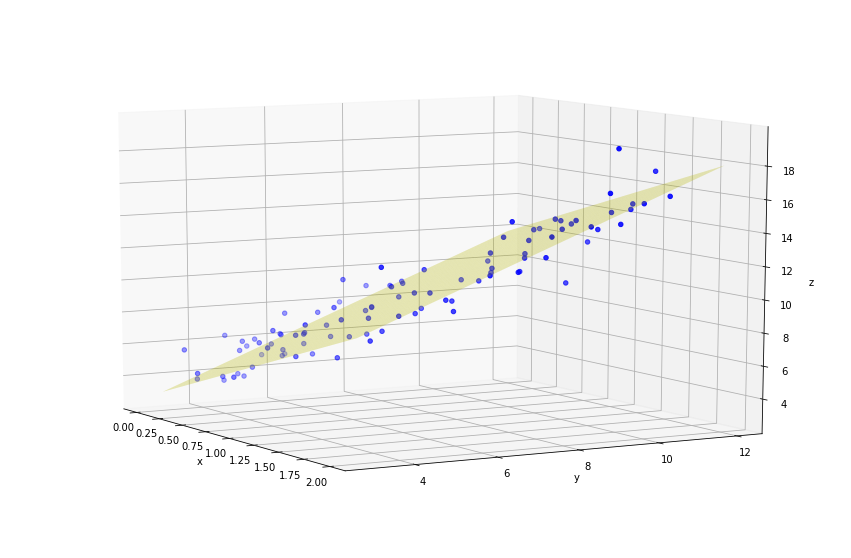

In [17]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(x, y, z, c='b')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, -30)

ax.plot_surface(x_new_mesh, y_new_mesh, z_new_mesh, alpha=0.3,color='y')

plt.show()

Pretty good fit!